In [141]:
from my_sort import p_distributions, thresholds, plot_strategy_domains, plot_partition_tree, mP
from sympy.stats import Binomial, density
from sympy import Symbol, integrate, solve, Interval, Rational
from math import comb
import numpy as np
from matplotlib import pyplot as plt
from sympy import lambdify, Symbol, Interval

In [19]:
mP(20,False)

0.000125320228596940

In [161]:
x =  range(1, 30)
prob = np.array([mP(i,False) for i in x])

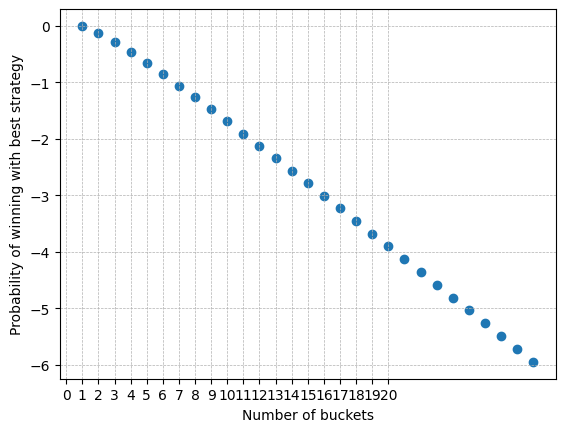

In [162]:
plt.scatter(x, np.log10(prob.astype(float)))
# plt.ylim([0,1])
plt.xlabel('Number of buckets')
plt.ylabel('Probability of winning with best strategy')
# plt.yticks(np.arange(0, 1, 0.1))
plt.xticks(np.arange(0, 21, 1))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

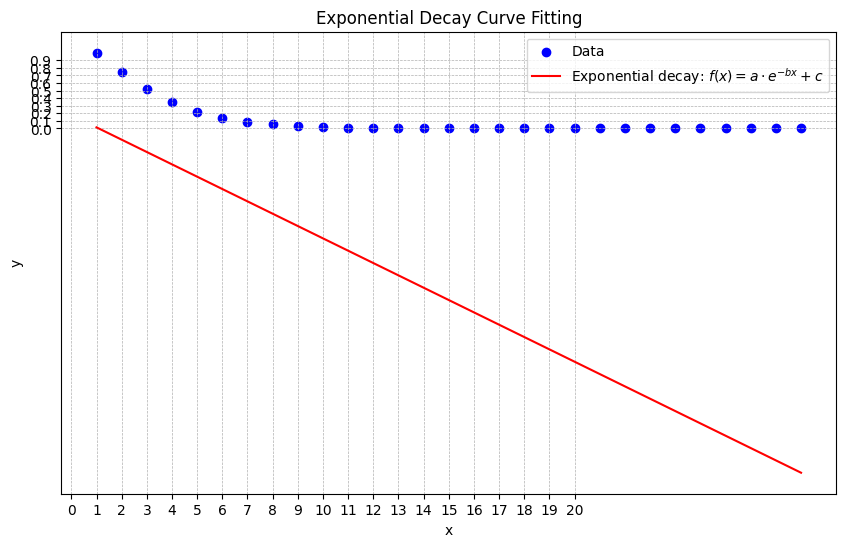

array([1.50438874, 0.3750991 ])

In [163]:
from scipy.optimize import curve_fit
y = prob
def exponential_decay(x, a, b):
    return a * np.exp(-b * x) 

# Use curve_fit to fit the exponential decay function to the data
params_exp, covariance_exp = curve_fit(exponential_decay, x, y, p0=(1, 0.1))

# Predicted values using the fitted parameters for the exponential decay function
y_fit_exp = exponential_decay(x, *params_exp)

# Plotting the original data and the fitted curve for the exponential decay function
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Data')
plt.plot(x, np.log10(y_fit_exp), color='red', label='Exponential decay: $f(x) = a \cdot e^{-bx} + c$')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.yticks(np.arange(0, 1, 0.1))
plt.xticks(np.arange(0, 21, 1))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.title('Exponential Decay Curve Fitting')
plt.grid(True)
plt.show()

params_exp

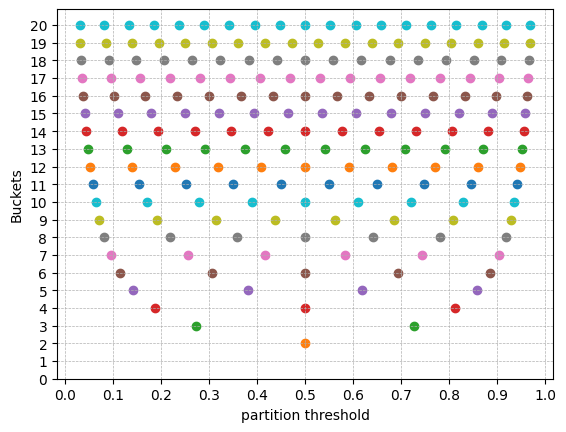

In [30]:
plot_partition_tree(n = 21, rational=False)

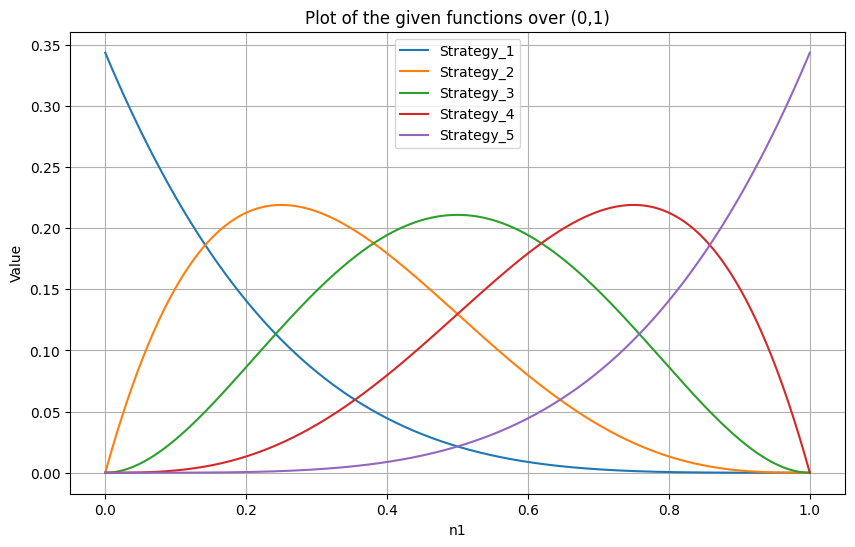

In [146]:
plot_strategy_domains(5)

In [90]:
mP(20)

0.000125320228596940

In [59]:
n = 10
new_array = [None] * n
numbers = np.random.uniform(0,1,n)


In [83]:
ref = np.array(thresholds(n))
new_array = [None] * n
current = numbers[0]

In [81]:
current

0.16134767391062366

In [86]:
ref

array([0.0639510572517834, 0.171125765291798, 0.279015338934645,
       0.389463144058984, 0.500000000000000, 0.610536855941016,
       0.720984661065355, 0.828874234708202, 0.936048942748216],
      dtype=object)

In [84]:
for i, r in enumerate(ref):
    if current < r:
        new_array[i] = current
        break

In [85]:
new_array

[None, 0.16134767391062366, None, None, None, None, None, None, None, None]

In [87]:
np.array(thresholds(20))

array([0.0304416746551050, 0.0813134579117635, 0.132343767462734,
       0.184703210515315, 0.237115257336122, 0.289646075398800,
       0.342211424287241, 0.394799222489076, 0.447397323051039,
       0.500000000000000, 0.552602676948961, 0.605200777510924,
       0.657788575712759, 0.710353924601200, 0.762884742663878,
       0.815296789484685, 0.867656232537266, 0.918686542088236,
       0.969558325344895], dtype=object)

In [89]:
mP(3, True)

377/726

In [4]:
from sympy.stats import Hypergeometric, Binomial, density

In [11]:
X = Hypergeometric('X', 1000, 2, 0.5)
density(X).dict

ValueError: 'm' must be nonnegative integer. m = 1000.

In [10]:
Y = Binomial('Y', 2, 0.5)
density(Y).dict

{0: 0.250000000000000, 1: 0.500000000000000, 2: 0.250000000000000}

In [131]:
# caso discreto
maxi = 1001
N = range(0,maxi)
half = maxi//2
from numpy import average as avrg

In [ ]:
# the case of odd is not exactly the same as the case of even
# as in even we can place the "half" number in both left and right

In [138]:
# could be simplified using the fact that the sum of the first n integers is n(n+1)/2
P1 = (sum([(maxi-i) for i in range(half)])+ sum([i for i in range(half+1, maxi)]))/maxi**2


In [139]:
P2 =

0.7495002499997505

375250